## Importing Libraries

In [1]:
import mtcnn
import numpy as np
import pandas as pd 
import cv2 
from mtcnn import MTCNN 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import load_model
from PIL import Image 
import os 
print(os.listdir("input"))

['data', 'facenet_keras.h5', 'train', 'val']


## Sample Images 

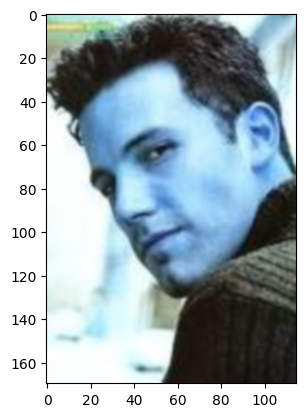

(170, 115, 3)


In [2]:
img = cv2.imread('input/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img, cmap = 'Dark2', interpolation = 'bicubic')
plt.show()
print(img.shape)

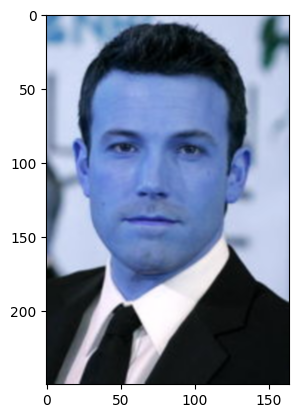

(250, 164, 3)


In [3]:
img = cv2.imread('input/data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg')
plt.imshow(img, cmap = 'Dark2', interpolation = 'bicubic')
plt.show()
print(img.shape)

In [30]:
def extract_face(filename, required_size=(160,160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = MTCNN
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1+width, y1+height
    face = pixels[y1:y2, x1:x2]
    image =  Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array
    

In [47]:
def load_face(dir):
    faces = list()
    for filename in os.listdir(dir):
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        path = os.path.join(dir, filename)
        face = extract_face(path)
        faces.append(face)
    return faces


In [46]:
def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = os.path.join(dir,subdir)
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir))
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

trainX, trainy = load_dataset('input/data/train')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("input/data/val")
print(testX.shape, testy.shape)
np.savez_compressed("5-celebrity-faces-dataset.npz", trainX, trainy, testX, testy) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1